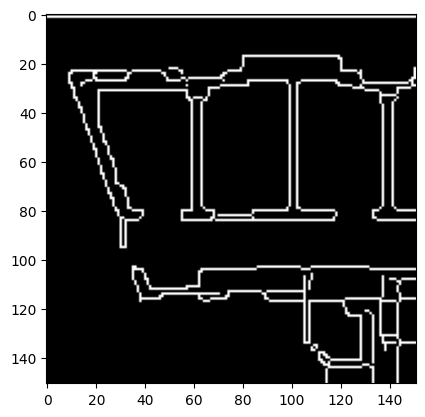

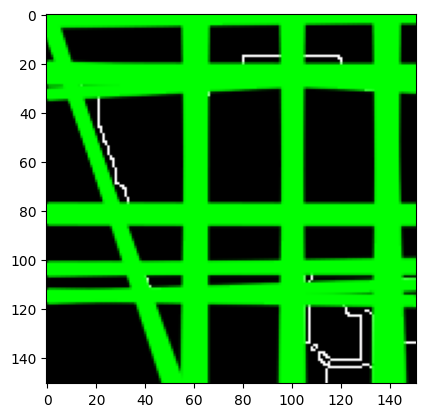

In [34]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'img/E2_2_tile.png'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name -- default ' + filename + '] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines
lines = cv.HoughLines(dst, 1, np.pi / 180, max_dim//3, None, 0, 0)

plt.imshow(cdst)
plt.show()

# Draw lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim) # Diagonal of the square image
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        
        # Check if the line is very diagonal or straight
        cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)
        

# Display the result
plt.imshow(cdst)
plt.show()

Tiling with diagonals

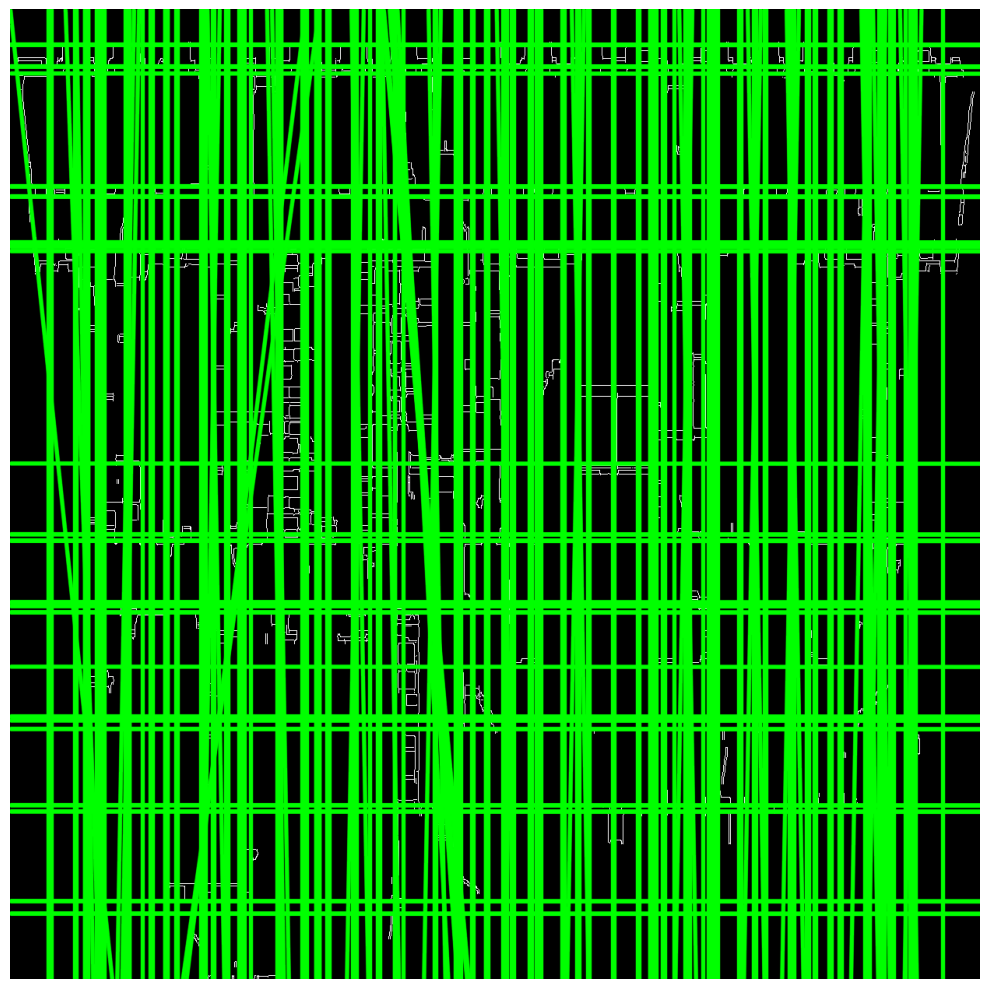

In [51]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'img/reassembled_E2_2.png'

# Loads an image
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j  # Adjust x-coordinate based on tile position
                y0 = b * rho + i  # Adjust y-coordinate based on tile position
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                
                # Check if the line is horizontal or vertical
                angle_deg = theta * 180 / np.pi
                if (-10 <= angle_deg <= 10) or (80 <= angle_deg <= 100) or (170 <= angle_deg <= 190) or (260 <= angle_deg <= 280) or (350 <= angle_deg <= 360):
                    cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

Tiling Without Most Diagonals

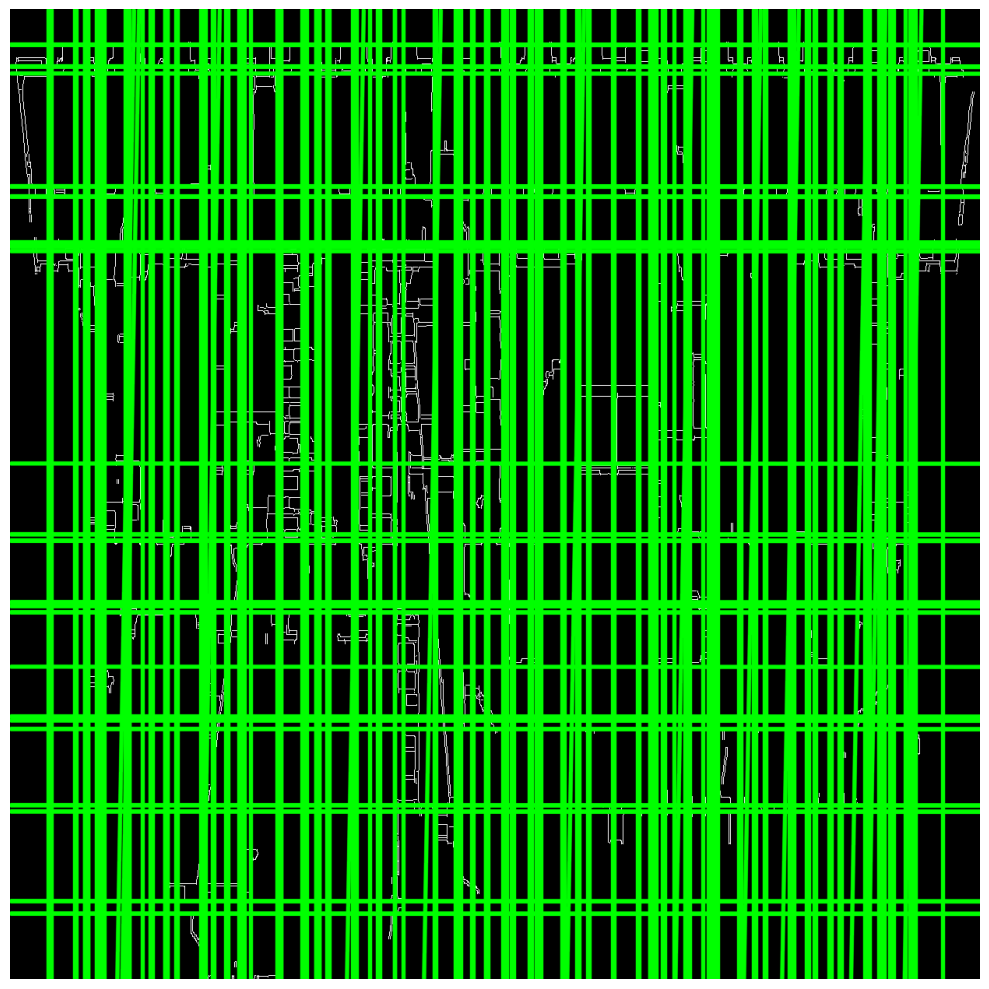

In [67]:
import cv2 as cv
import numpy as np
import math

# ------------
# ------------

filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
   print('Error opening image!')
   print('Usage: hough_lines.py [image_name] \n')
   exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
   for j in range(0, max_dim, tile_size):
       tile = dst[i:i+tile_size, j:j+tile_size]
       lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
       if lines is not None:
           for line in lines:
               rho, theta = line[0]
               a = math.cos(theta)
               b = math.sin(theta)
               x0 = a * rho + j  # Adjust x-coordinate based on tile position
               y0 = b * rho + i  # Adjust y-coordinate based on tile position
               max_len = int(np.sqrt(2) * max_dim)
               pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
               pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))

               # Check if the line is horizontal or vertical
               angle_deg = theta * 180 / np.pi
               tolerance = 1  # Adjust tolerance as needed
               if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
                cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()